# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [89]:
df.head()
filtered_df = df.dropna(how='any')
len(filtered_df)
filtered_df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Text(0.5, 1.0, 'Частотный график Freedom (разбиение интервала по 10 элементов)')

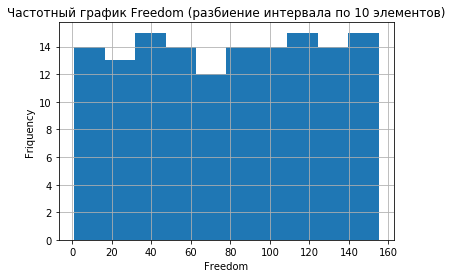

In [76]:
freedom = filtered_df['Freedom'] 
freedom.hist(bins = 10)
plt.xlabel('Freedom')
plt.ylabel('Friquency')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')



#### Вывод: распределение равномерное


Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [77]:
freedom = filtered_df['Freedom']


In [78]:
'Медина'
import statistics
print('Медиана: ', statistics.median(freedom))

Медиана:  79.5


In [83]:
'Мат ожидание'

statistics.mean(freedom)

78.82857142857142

In [84]:
'Максимум'
max(freedom)

155.0

In [85]:
'Минимум'
min(freedom)

1.0

In [86]:
'Дисперсия'

statistics.pvariance(freedom)

2020.2848979591836

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

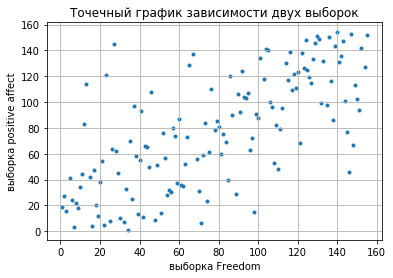

In [100]:


Freedom  = filtered_df['Freedom']
positive_affect = filtered_df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка positive affect')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)

plt.scatter(Freedom, positive_affect, marker='.')

In [91]:
from scipy.stats import pearsonr

In [97]:
corr, value = pearsonr(Freedom, positive_affect)
print(corr)

0.6965670458090686


#### Вывод: существует линейная зависимость

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [101]:
print(statistics.mean(freedom))

78.82857142857142


In [103]:
#нормализуем полученное значение
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(min(freedom_1)))

6.496390726949487e-15


In [106]:
#маштабирование
min(freedom_1)

-77.82857142857142

In [107]:
max(freedom_1)

76.17142857142858

In [108]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

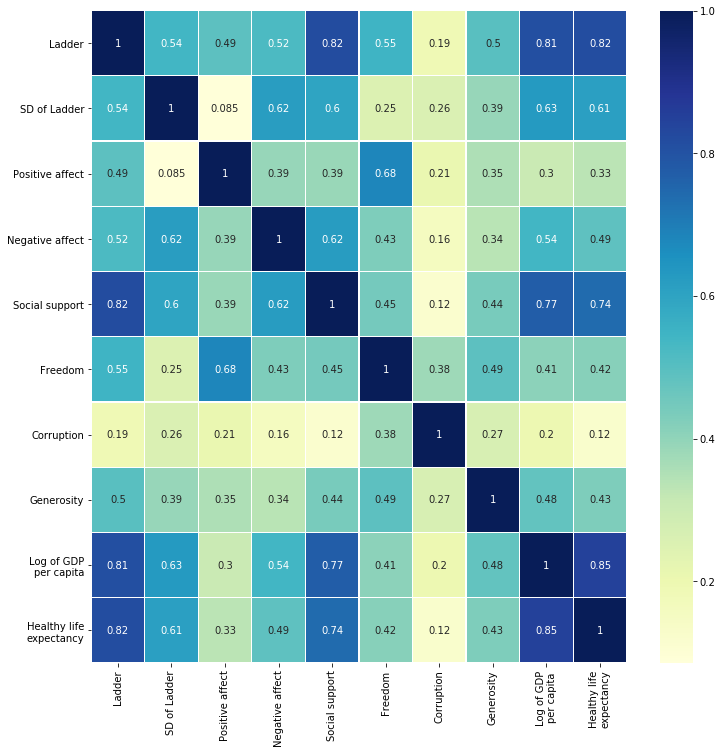

In [111]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [142]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]
#df.info()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

Text(0.5, 1.0, 'Частотный график AveragePrice (разбиение интервала по 50 элементов)')

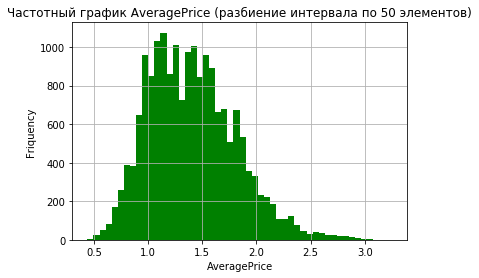

In [128]:
AveragePrice = df['AveragePrice'] 
AveragePrice.hist(bins = 50, color = 'g')

plt.xlabel('AveragePrice')
plt.ylabel('Friquency')
plt.title('Частотный график AveragePrice (разбиение интервала по 50 элементов)')


### Вывод: распределение нормальное

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

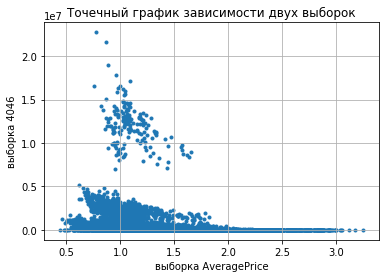

In [141]:
AveragePrice = df['AveragePrice'] 
PLU_4046 = df['4046']
plt.xlabel('выборка AveragePrice')
plt.ylabel('выборка 4046')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)

plt.scatter(AveragePrice,PLU_4046,  marker='.')

### Вывод: Данный вид авокадо(PLU_4046) никак не влияет на среднюю стоимость